In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import tensorflow as tf

In [ ]:
# what is CNN as ANN can not be used for complex img recognization
# computer recogninse an img with dig(0-255)

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

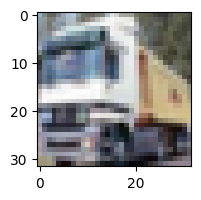

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [5]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [7]:
x_train = x_train/225
x_test = x_test/255

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [9]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 1.4583 - accuracy: 0.4797
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1181 - accuracy: 0.6086
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9803 - accuracy: 0.6550
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8903 - accuracy: 0.6885
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8173 - accuracy: 0.7142
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7564 - accuracy: 0.7353
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7022 - accuracy: 0.7544
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6550 - accuracy: 0.7710
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6103 - accuracy: 0.7853
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.56

In [11]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9542 - accuracy: 0.6909


[0.9541857242584229, 0.6909000277519226]

In [13]:
pred = cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [15]:
y_test[0]

3

In [18]:
np.argmax(pred[0])

3

In [20]:
y_pred = [np.argmax(ele) for ele in pred]
y_pred[:5]

[3, 8, 8, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)